In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install kaggle
!pip install librosa
!pip install datasets
!pip install pydub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.9 MB/s eta 0:00:00


In [ ]:
!kaggle datasets download -d mansourehk/shemo-persian-speech-emotion-detection-database

 99% 818M/829M [00:08<00:00, 85.5MB/s]
100% 829M/829M [00:09<00:00, 96.6MB/s]


In [ ]:
!rm -r transcript
!rm -r female
!rm -r male
!rm -r dataset

rm: cannot remove 'female': No such file or directory
rm: cannot remove 'male': No such file or directory


In [ ]:
!unzip "/content/shemo-persian-speech-emotion-detection-database.zip" -d "/content/"


Streaming output truncated to the last 5000 lines.
  inflating: /content/transcript/final script/F24A22.tra  
  inflating: /content/transcript/final script/F24A23.tra  
  inflating: /content/transcript/final script/F24A24.tra  
  inflating: /content/transcript/final script/F24A25.tra  
  inflating: /content/transcript/final script/F24A26.tra  
  inflating: /content/transcript/final script/F24A27.tra  
  inflating: /content/transcript/final script/F24A28.tra  
  inflating: /content/transcript/final script/F24A29.tra  
  inflating: /content/transcript/final script/F24A30.tra  
  inflating: /content/transcript/final script/F24A31.tra  
  inflating: /content/transcript/final script/F24A32.tra  
  inflating: /content/transcript/final script/F24A33.tra  
  inflating: /content/transcript/final script/F24A34.tra  
  inflating: /content/transcript/final script/F24A35.tra  
  inflating: /content/transcript/final script/F24A36.tra  
  inflating: /content/transcript/final script/F24A37.tra  
  inf

In [ ]:
!mkdir dataset
!mv female dataset
!mv male dataset


In [ ]:
!rm -r /content/dataset/female/segmented_audio
!rm -r /content/dataset/male/segmented_audio

rm: cannot remove '/content/dataset/female/segmented_audio': No such file or directory
rm: cannot remove '/content/dataset/male/segmented_audio': No such file or directory


# Reading and showing data

In [ ]:
import os
import pandas as pd
# Path to your dataset folders (male and fema|le)
male_folder = '/content/dataset/male'
female_folder = '/content/dataset/female'

# Dictionary to store information
data_info = {
    'male': [],
    'female': []
}

# Function to extract information from the file names
def extract_info(file_path):
    file_info = {}
    filename = os.path.basename(file_path)  # Extract filename from the path
    file_info['gender'] = filename[0]  # Extracting the gender (M or F)
    file_info['speaker_code'] = filename[1:3]  # Extracting the speaker code
    file_info['emotion'] = filename[3]  # Extracting the emotion code
    file_info['utterance_number'] = filename[4:]  # Extracting the utterance number
    file_info['path'] = file_path  # Storing the complete file path
    return file_info

data = []

# Process male folder
for filename in os.listdir(male_folder):
    file_path = os.path.join(male_folder, filename)
    file_info = extract_info(file_path)
    data.append(file_info)

# Process female folder
for filename in os.listdir(female_folder):
    file_path = os.path.join(female_folder, filename)
    file_info = extract_info(file_path)
    data.append(file_info)

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


     gender speaker_code emotion utterance_number  \
0         M           12       N           01.wav   
1         M           48       N           02.wav   
2         M           26       A           24.wav   
3         M           26       A           04.wav   
4         M           43       A           16.wav   
...     ...          ...     ...              ...   
2995      F           24       A           49.wav   
2996      F           24       N           02.wav   
2997      F           22       A           08.wav   
2998      F           29       H           01.wav   
2999      F           24       S           12.wav   

                                    path  
0       /content/dataset/male/M12N01.wav  
1       /content/dataset/male/M48N02.wav  
2       /content/dataset/male/M26A24.wav  
3       /content/dataset/male/M26A04.wav  
4       /content/dataset/male/M43A16.wav  
...                                  ...  
2995  /content/dataset/female/F24A49.wav  
2996  /content/data

In [ ]:
import librosa

# Function to calculate duration in seconds for an audio file
def get_duration(file_path):
    audio, sr = librosa.load(file_path)
    duration_sec = librosa.get_duration(y=audio, sr=sr)
    return duration_sec

# Assuming 'df' contains a column named 'path' with file paths
# Add a new column 'duration_sec' to store voice durations
df['duration_sec'] = df['path'].apply(lambda x: get_duration(x))


## Data Viz

In [ ]:
df.head()

,gender,speaker_code,emotion,utterance_number,path,duration_sec
0,M,12,N,01.wav,/content/dataset/male/M12N01.wav,2.557642
1,M,48,N,02.wav,/content/dataset/male/M48N02.wav,2.199637
2,M,26,A,24.wav,/content/dataset/male/M26A24.wav,1.424172
3,M,26,A,04.wav,/content/dataset/male/M26A04.wav,1.278821
4,M,43,A,16.wav,/content/dataset/male/M43A16.wav,5.717732


In [ ]:
df.describe(include='all')

,gender,speaker_code,emotion,utterance_number,path,duration_sec
count,3000,3000,3000,3000,3000,3000.000000
unique,2,56,6,87,3000,NaN
top,M,12,A,01.wav,/content/dataset/male/M12N01.wav,NaN
freq,1737,208,1059,341,1,NaN
mean,NaN,NaN,NaN,NaN,NaN,4.111807
std,NaN,NaN,NaN,NaN,NaN,3.414900
min,NaN,NaN,NaN,NaN,NaN,0.358639
25%,NaN,NaN,NaN,NaN,NaN,1.955113
50%,NaN,NaN,NaN,NaN,NaN,3.079637
75%,NaN,NaN,NaN,NaN,NaN,5.104093


In [ ]:
# Value counts for the 'gender' column
gender_counts = df['gender'].value_counts()

# Display the value counts for gender
print(gender_counts)


M    1737
F    1263
Name: gender, dtype: int64


In [ ]:
# Value counts for the 'gender' column
gender_counts = df['emotion'].value_counts()

# Display the value counts for gender
print(gender_counts)

A    1059
N    1028
S     449
W     225
H     201
F      38
Name: emotion, dtype: int64


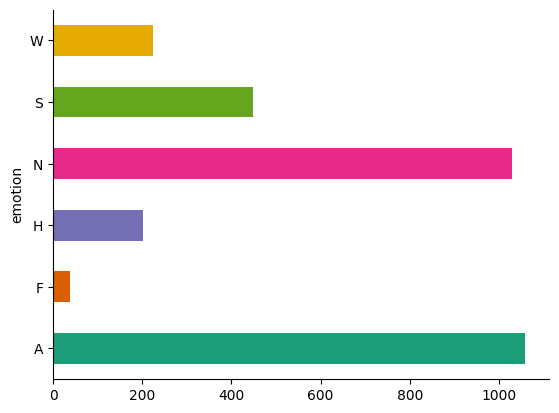

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

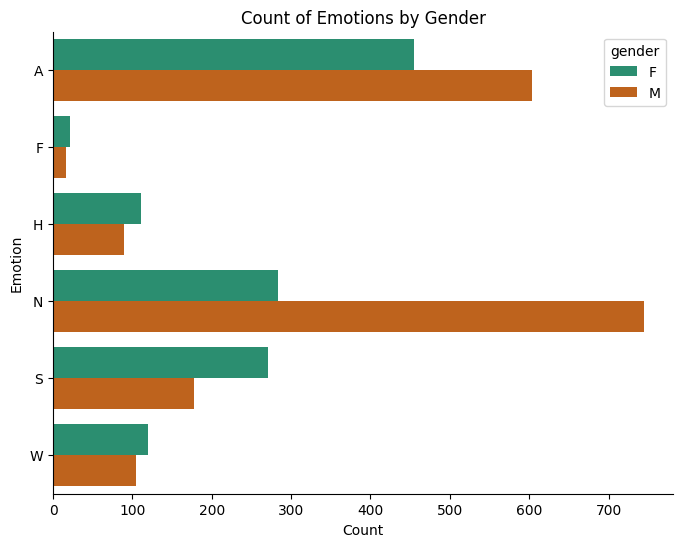

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Assuming 'df' contains your DataFrame with columns 'gender' and 'emotion'

# Grouping by 'gender' and 'emotion', then counting occurrences
grouped = df.groupby(['gender', 'emotion']).size().reset_index(name='count')

# Plotting the grouped bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='count', y='emotion', hue='gender', data=grouped, palette='Dark2')

# Removing the spines (top and right)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.title('Count of Emotions by Gender')

plt.show()


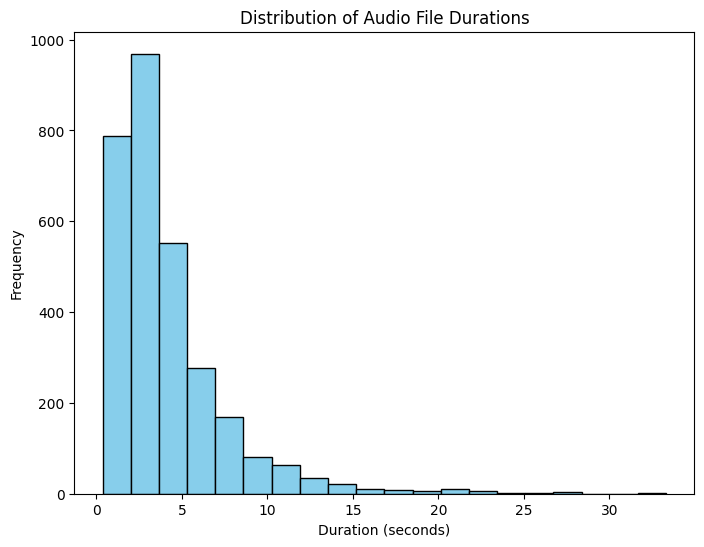

In [ ]:
import matplotlib.pyplot as plt

# Plotting a histogram of durations
plt.figure(figsize=(8, 6))
plt.hist(df['duration_sec'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Audio File Durations')
plt.show()


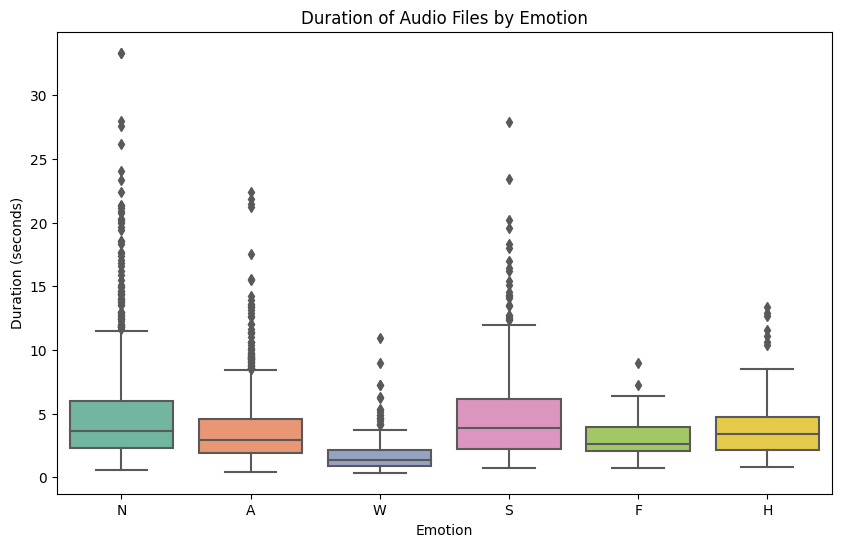

In [ ]:
import seaborn as sns

# Boxplot of duration by emotion
plt.figure(figsize=(10, 6))
sns.boxplot(x='emotion', y='duration_sec', data=df, palette='Set2')
plt.xlabel('Emotion')
plt.ylabel('Duration (seconds)')
plt.title('Duration of Audio Files by Emotion')
plt.show()


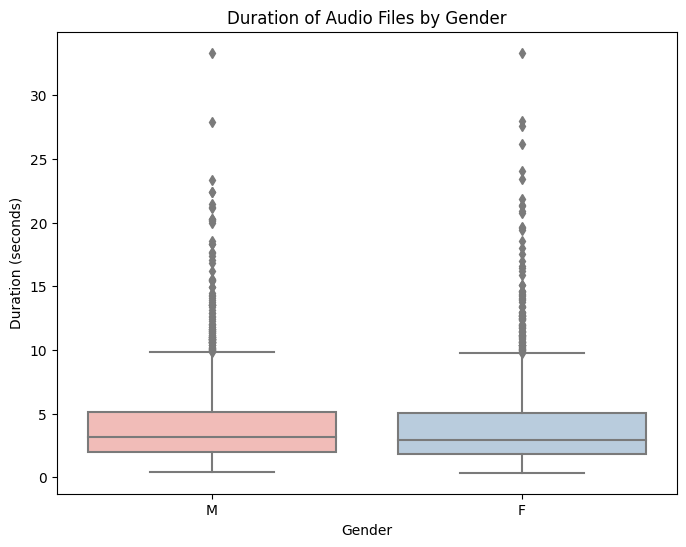

In [ ]:
# Boxplot of duration by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='duration_sec', data=df, palette='Pastel1')
plt.xlabel('Gender')
plt.ylabel('Duration (seconds)')
plt.title('Duration of Audio Files by Gender')
plt.show()


## Dataloader

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['labels'] = label_encoder.fit_transform(df['emotion'])

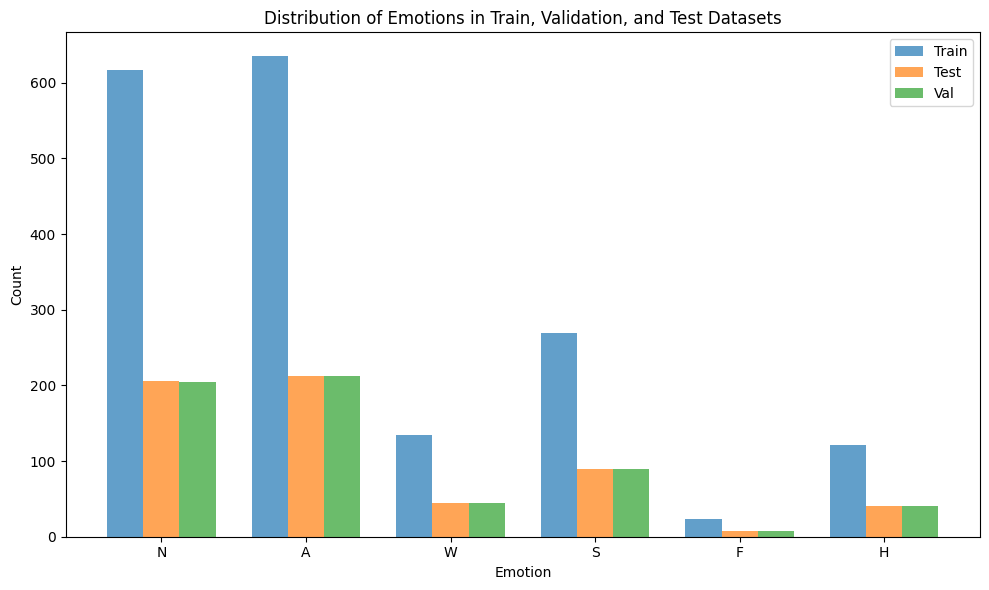

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' contains your DataFrame with 'emotion' as the target column
# Splitting the data into train (60%), validation (20%), and test (20%) while preserving the distribution of 'emotion'
train_df, test_val_df = train_test_split(df, test_size=0.4, stratify=df['emotion'])
test_df, val_df = train_test_split(test_val_df, test_size=0.5, stratify=test_val_df['emotion'])

# Get unique emotions
emotions = df['emotion'].unique()
num_emotions = len(emotions)

# Calculate emotion counts in train, validation, and test datasets
train_emotion_counts = train_df['emotion'].value_counts().reindex(emotions, fill_value=0)
test_emotion_counts = test_df['emotion'].value_counts().reindex(emotions, fill_value=0)
val_emotion_counts = val_df['emotion'].value_counts().reindex(emotions, fill_value=0)

# Set the positions for bars
bar_width = 0.25
index = np.arange(num_emotions)

# Plotting the distribution of emotions in train, validation, and test datasets side by side
plt.figure(figsize=(10, 6))
plt.bar(index, train_emotion_counts.values, alpha=0.7, label='Train', width=bar_width)
plt.bar(index + bar_width, test_emotion_counts.values, alpha=0.7, label='Test', width=bar_width)
plt.bar(index + 2 * bar_width, val_emotion_counts.values, alpha=0.7, label='Val', width=bar_width)

plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions in Train, Validation, and Test Datasets')
plt.xticks(index + bar_width, emotions)  # Set x-axis labels
plt.legend()
plt.tight_layout()
plt.show()


## Model

In [ ]:
from transformers import Wav2Vec2FeatureExtractor
from datasets import Dataset
import librosa

def map_to_array(example):
    speech, _ = librosa.load(example["path"], sr=16000, mono=True)
    example["speech"] = speech
    return example

train_data = Dataset.from_pandas(train_df).map(map_to_array)
test_data = Dataset.from_pandas(test_df).map(map_to_array)
val_data = Dataset.from_pandas(val_df).map(map_to_array)



Map:   0%|          | 0/1800 [00:00<?, ? examples/s]

Map:   0%|          | 0/600 [00:00<?, ? examples/s]

Map:   0%|          | 0/600 [00:00<?, ? examples/s]

In [ ]:
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/hubert-base-ls960")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/213 [00:00<?, ?B/s]

In [ ]:
def preprocess_function(examples):
    audio_arrays = [x for x in examples["speech"]]
    inputs = feature_extractor(
        audio_arrays, sampling_rate=feature_extractor.sampling_rate,max_length=16000, truncation=True, padding=True
    )
    return inputs

In [ ]:

train_encodings = train_data.map(preprocess_function, remove_columns="speech", batched=True)
test_encodings = test_data.map(preprocess_function, remove_columns="speech", batched=True)
val_encodings = val_data.map(preprocess_function, remove_columns="speech", batched=True)


Map:   0%|          | 0/1800 [00:00<?, ? examples/s]

Map:   0%|          | 0/600 [00:00<?, ? examples/s]

Map:   0%|          | 0/600 [00:00<?, ? examples/s]

In [ ]:
train_dataset = train_encodings.with_format("torch")
test_dataset = test_encodings.with_format("torch")
val_dataset = val_encodings.with_format("torch")

In [ ]:
import torch.nn as nn
from transformers import HubertModel

class HUBERTClassification(nn.Module):
    def __init__(self):
        super(HUBERTClassification, self).__init__()
        self.bert = HubertModel.from_pretrained("superb/hubert-base-superb-ks")
        self.bert.feature_extractor._freeze_parameters()

        self.bat2 = nn.BatchNorm1d(768)
        self.rel2 = nn.ReLU(inplace=True)
        self.drop1 = nn.Dropout(0.4)
        self.out2 = nn.Linear(768, 6)
        self.rel3 = nn.ReLU(inplace=True)

    def forward(self, inputs, attention_mask=None, labels=None):
        output = self.bert(inputs)['last_hidden_state']
        output = self.bat2(output.mean(axis=1))  # for wav2vec

        output = self.rel2(output)
        output = self.drop1(output)
        output = self.out2(output)
        output = self.rel3(output)

        return output


In [ ]:
from transformers import HubertForSequenceClassification
from torch.optim import AdamW
import torch
from tqdm import tqdm
# Loading the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = HUBERTClassification()
model.to(device)

# Loading the optimizer
optim = AdamW(model.parameters(), lr=1e-5)

Some weights of HubertModel were not initialized from the model checkpoint at superb/hubert-base-superb-ks and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def accuracy(predictions, labels):
    """
    Calculate the accuracy of predictions given the true labels.
    Args:
        predictions (torch.Tensor): Model predictions.
        labels (torch.Tensor): True labels.

    Returns:
        float: Accuracy.
    """
    _, predicted = torch.max(predictions, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy


In [ ]:
# Training

from torch.utils.data import DataLoader
import time
import torch.nn as nn
from torch.optim import AdamW
from tqdm import tqdm  # Assuming you're using tqdm for progress tracking

# Set the number of epochs
epochs = 10

# Start training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.to(device)

model.train()

train_accuracies = []
train_losses = []
val_accuracies = []
val_losses = []

# Define your loss function
criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=1e-5)
from tqdm import tqdm

# ... (your imports and code)

for epoch_i in range(epochs):
    print('Epoch %s/%s' % (epoch_i + 1, epochs))

    # Training
    model.train()  # Set the model to training mode
    correct_train = 0
    total_train = 0
    epoch_train_loss = 0.0

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    pbar_train = tqdm(train_loader, desc="Training", leave=False)

    for batch in pbar_train:
        optimizer.zero_grad()
        input_ids = batch['input_values'].to(device)
        labels = batch['labels'].type(torch.LongTensor).to(device)

        labels_pred = model(input_ids)
        loss = criterion(labels_pred, labels)
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item()

        _, predicted = torch.max(labels_pred.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        accuracy_train = correct_train / total_train
        average_train_loss = epoch_train_loss / (pbar_train.n + 1)  # +1 to avoid division by zero
        pbar_train.set_postfix(loss=average_train_loss, accuracy=accuracy_train)
        pbar_train.update()

    train_accuracies.append(accuracy_train)
    train_losses.append(average_train_loss)
    pbar_train.close()

    # Validation
    model.eval()  # Set the model to evaluation mode
    correct_val = 0
    total_val = 0
    epoch_val_loss = 0.0

    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    pbar_val = tqdm(val_loader, desc="Validation", leave=False)

    with torch.no_grad():  # No need to compute gradients during validation
        for batch in pbar_val:
            input_ids = batch['input_values'].to(device)
            labels = batch['labels'].type(torch.LongTensor).to(device)

            labels_pred = model(input_ids)
            loss = criterion(labels_pred, labels)

            _, predicted = torch.max(labels_pred.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            epoch_val_loss += loss.item()

            accuracy_val = correct_val / total_val
            average_val_loss = epoch_val_loss / (pbar_val.n + 1)  # +1 to avoid division by zero
            pbar_val.set_postfix(loss=average_val_loss, accuracy=accuracy_val)
            pbar_val.update()

    val_accuracies.append(accuracy_val)
    val_losses.append(average_val_loss)
    pbar_val.close()
    print(f"Epoch {epoch_i + 1} - Training Loss: {average_train_loss:.4f}, Training Accuracy: {accuracy_train:.4f}")
    print(f"Epoch {epoch_i + 1} - Validation Loss: {average_val_loss:.4f}, Validation Accuracy: {accuracy_val:.4f}")

# At this point, you can log or print the training metrics, and if needed, validate your model on a validation set.


Epoch 1/10


Epoch 1 - Training Loss: 0.7911, Training Accuracy: 0.6911
Epoch 1 - Validation Loss: 0.7443, Validation Accuracy: 0.6950
Epoch 2/10


Epoch 2 - Training Loss: 0.7640, Training Accuracy: 0.7006
Epoch 2 - Validation Loss: 0.8740, Validation Accuracy: 0.6617
Epoch 3/10


Epoch 3 - Training Loss: 0.7333, Training Accuracy: 0.7300
Epoch 3 - Validation Loss: 0.7507, Validation Accuracy: 0.7083
Epoch 4/10


Epoch 4 - Training Loss: 0.7187, Training Accuracy: 0.7306
Epoch 4 - Validation Loss: 0.7762, Validation Accuracy: 0.7083
Epoch 5/10


Epoch 5 - Training Loss: 0.6770, Training Accuracy: 0.7444
Epoch 5 - Validation Loss: 0.7286, Validation Accuracy: 0.7067
Epoch 6/10


Epoch 6 - Training Loss: 0.6514, Training Accuracy: 0.7439
Epoch 6 - Validation Loss: 0.7384, Validation Accuracy: 0.7200
Epoch 7/10


Epoch 7 - Training Loss: 0.6442, Training Accuracy: 0.7633
Epoch 7 - Validation Loss: 0.7018, Validation Accuracy: 0.7317
Epoch 8/10


Epoch 8 - Training Loss: 0.6119, Training Accuracy: 0.7772
Epoch 8 - Validation Loss: 0.7446, Validation Accuracy: 0.7067
Epoch 9/10


Epoch 9 - Training Loss: 0.6459, Training Accuracy: 0.7539
Epoch 9 - Validation Loss: 0.7456, Validation Accuracy: 0.7383
Epoch 10/10


Epoch 10 - Training Loss: 0.6149, Training Accuracy: 0.7722
Epoch 10 - Validation Loss: 0.7056, Validation Accuracy: 0.7283


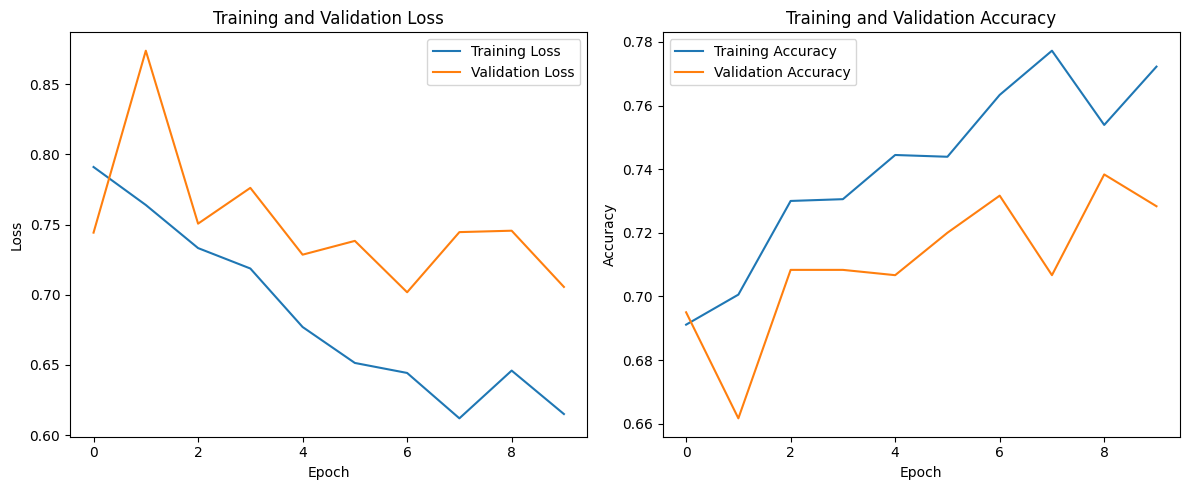

In [ ]:
import matplotlib.pyplot as plt

# ... (your imports and code)

# Your existing code for training and validation loops

# Plotting
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


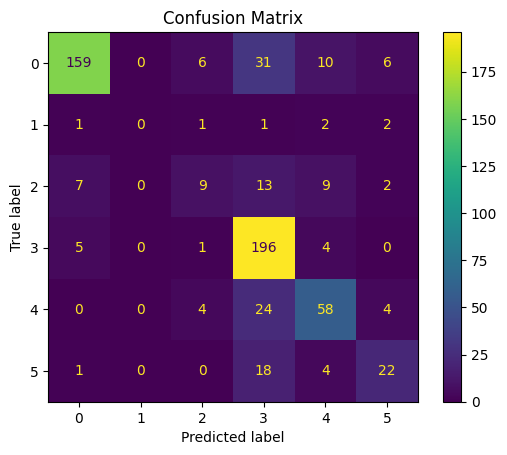

In [ ]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ... (your imports and code)

# Assuming you have a test_loader for your test dataset
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_labels = []

with torch.no_grad():  # No need to compute gradients during testing
    for batch in test_loader:
        input_ids = batch['input_values'].to(device)
        labels = batch['labels'].type(torch.LongTensor).to(device)

        labels_pred = model(input_ids)
        _, predicted = torch.max(labels_pred.data, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import torch
from sklearn.metrics import accuracy_score, classification_report

# ... (your imports and code)

# Assuming you have a test_loader for your test dataset
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_labels = []

with torch.no_grad():  # No need to compute gradients during testing
    for batch in test_loader:
        input_ids = batch['input_values'].to(device)
        labels = batch['labels'].type(torch.LongTensor).to(device)

        labels_pred = model(input_ids)
        _, predicted = torch.max(labels_pred.data, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute accuracy
accuracy = accuracy_score(all_labels, all_predictions)
print(f'Test Accuracy: {accuracy:.4f}')

# Classification report
class_names = [f'Class {i}' for i in range(6)]  # Replace with your actual class names
report = classification_report(all_labels, all_predictions, target_names=class_names)
print('Classification Report:\n', report)


Test Accuracy: 0.7400
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.92      0.75      0.83       212
     Class 1       0.00      0.00      0.00         7
     Class 2       0.43      0.23      0.30        40
     Class 3       0.69      0.95      0.80       206
     Class 4       0.67      0.64      0.66        90
     Class 5       0.61      0.49      0.54        45

    accuracy                           0.74       600
   macro avg       0.55      0.51      0.52       600
weighted avg       0.74      0.74      0.73       600



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Preprocessing (converting all Voices to 5 Sec)

In [ ]:
import os
import pandas as pd
# Path to your dataset folders (male and fema|le)
male_folder = '/content/dataset/male'
female_folder = '/content/dataset/female'

# Dictionary to store information
data_info = {
    'male': [],
    'female': []
}

# Function to extract information from the file names
def extract_info(file_path):
    file_info = {}
    filename = os.path.basename(file_path)  # Extract filename from the path
    file_info['gender'] = filename[0]  # Extracting the gender (M or F)
    file_info['speaker_code'] = filename[1:3]  # Extracting the speaker code
    file_info['emotion'] = filename[3]  # Extracting the emotion code
    file_info['utterance_number'] = filename[4:]  # Extracting the utterance number
    file_info['path'] = file_path  # Storing the complete file path
    return file_info

data = []

# Process male folder
for filename in os.listdir(male_folder):
    file_path = os.path.join(male_folder, filename)
    file_info = extract_info(file_path)
    data.append(file_info)

# Process female folder
for filename in os.listdir(female_folder):
    file_path = os.path.join(female_folder, filename)
    file_info = extract_info(file_path)
    data.append(file_info)

# Create a DataFrame from the collected data
df = pd.DataFrame(data)



In [ ]:
import os  # Import the os module for directory operations
import librosa
import soundfile as sf

def split_audio_and_save(row):
    file_path = row['path']
    audio, sr = librosa.load(file_path, sr=16000)  # Load the audio file

    segment_duration = 5  # Duration of each segment in seconds
    segment_samples = sr * segment_duration  # Convert duration to samples

    # Create a folder to save the segmented audio files if it doesn't exist
    folder_path = os.path.join(os.path.dirname(file_path), 'segmented_audio')
    os.makedirs(folder_path, exist_ok=True)

    # Split the audio into segments of 5 seconds each
    for i in range(0, len(audio), segment_samples):
        segment = audio[i:i + segment_samples]

        # Save the segment as a separate file in the folder
        segment_file_path = os.path.join(folder_path, f"{os.path.basename(file_path)}_segment_{i // segment_samples + 1}.wav")
        sf.write(segment_file_path, segment, sr)

# Apply the function to each row in the DataFrame
df.apply(split_audio_and_save, axis=1)


0       None
1       None
2       None
3       None
4       None
        ... 
2995    None
2996    None
2997    None
2998    None
2999    None
Length: 3000, dtype: object

In [ ]:
!mkdir modified_dataset
!mkdir modified_dataset/male
!mkdir modified_dataset/female
!mv /content/dataset/female/segmented_audio/* modified_dataset/female/
!mv /content/dataset/male/segmented_audio/* modified_dataset/male/


In [ ]:
import os
import pandas as pd
# Path to your dataset folders (male and fema|le)
male_folder = '/content/modified_dataset/male'
female_folder = '/content/modified_dataset/female'

# Dictionary to store information
data_info = {
    'male': [],
    'female': []
}

# Function to extract information from the file names
def extract_info(file_path):
    file_info = {}
    filename = os.path.basename(file_path)  # Extract filename from the path
    file_info['gender'] = filename[0]  # Extracting the gender (M or F)
    file_info['speaker_code'] = filename[1:3]  # Extracting the speaker code
    file_info['emotion'] = filename[3]  # Extracting the emotion code
    file_info['utterance_number'] = filename[4:]  # Extracting the utterance number
    file_info['path'] = file_path  # Storing the complete file path
    return file_info

data = []

# Process male folder
for filename in os.listdir(male_folder):
    file_path = os.path.join(male_folder, filename)
    file_info = extract_info(file_path)
    data.append(file_info)

# Process female folder
for filename in os.listdir(female_folder):
    file_path = os.path.join(female_folder, filename)
    file_info = extract_info(file_path)
    data.append(file_info)

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


     gender speaker_code emotion      utterance_number  \
0         M           12       A  59.wav_segment_1.wav   
1         M           02       N  07.wav_segment_1.wav   
2         M           40       N  25.wav_segment_3.wav   
3         M           44       N  07.wav_segment_2.wav   
4         M           41       H  02.wav_segment_2.wav   
...     ...          ...     ...                   ...   
4031      F           23       A  20.wav_segment_1.wav   
4032      F           01       H  04.wav_segment_1.wav   
4033      F           28       A  13.wav_segment_1.wav   
4034      F           17       S  04.wav_segment_1.wav   
4035      F           11       A  01.wav_segment_1.wav   

                                                   path  
0     /content/modified_dataset/male/M12A59.wav_segm...  
1     /content/modified_dataset/male/M02N07.wav_segm...  
2     /content/modified_dataset/male/M40N25.wav_segm...  
3     /content/modified_dataset/male/M44N07.wav_segm...  
4     /conten

In [ ]:
print(len(df))

4036


In [ ]:
import librosa

# Function to calculate duration in seconds for an audio file
def get_duration(file_path):
    audio, sr = librosa.load(file_path)
    duration_sec = librosa.get_duration(y=audio, sr=sr)
    return duration_sec

# Assuming 'df' contains a column named 'path' with file paths
# Add a new column 'duration_sec' to store voice durations
df['duration_sec'] = df['path'].apply(lambda x: get_duration(x))


In [ ]:
df.head()

,gender,speaker_code,emotion,utterance_number,path,duration_sec
0,M,12,A,59.wav_segment_1.wav,/content/modified_dataset/male/M12A59.wav_segm...,5.000000
1,M,02,N,07.wav_segment_1.wav,/content/modified_dataset/male/M02N07.wav_segm...,4.117279
2,M,40,N,25.wav_segment_3.wav,/content/modified_dataset/male/M40N25.wav_segm...,0.828209
3,M,44,N,07.wav_segment_2.wav,/content/modified_dataset/male/M44N07.wav_segm...,5.000000
4,M,41,H,02.wav_segment_2.wav,/content/modified_dataset/male/M41H02.wav_segm...,2.851791


In [ ]:
df.describe(include='all')

,gender,speaker_code,emotion,utterance_number,path,duration_sec
count,4036,4036,4036,4036,4036,4036.000000
unique,2,56,6,282,4036,NaN
top,M,12,N,01.wav_segment_1.wav,/content/modified_dataset/male/M12A59.wav_segm...,NaN
freq,2332,285,1523,341,1,NaN
mean,NaN,NaN,NaN,NaN,NaN,3.056381
std,NaN,NaN,NaN,NaN,NaN,1.566565
min,NaN,NaN,NaN,NaN,NaN,0.006349
25%,NaN,NaN,NaN,NaN,NaN,1.720420
50%,NaN,NaN,NaN,NaN,NaN,2.950839
75%,NaN,NaN,NaN,NaN,NaN,5.000000


In [ ]:
# Value counts for the 'gender' column
gender_counts = df['gender'].value_counts()

# Display the value counts for gender
print(gender_counts)


M    2332
F    1704
Name: gender, dtype: int64


In [ ]:
# Value counts for the 'gender' column
gender_counts = df['emotion'].value_counts()

# Display the value counts for gender
print(gender_counts)

N    1523
A    1314
S     667
H     253
W     235
F      44
Name: emotion, dtype: int64


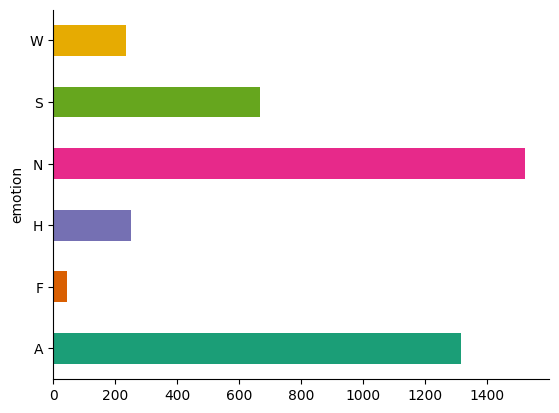

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

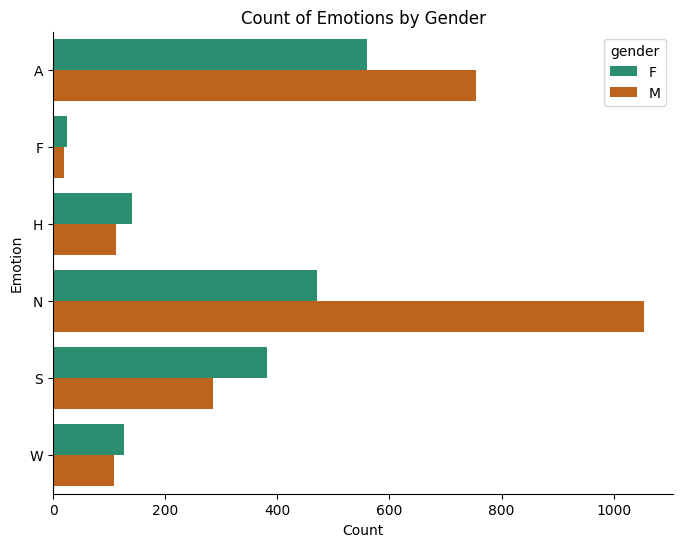

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Assuming 'df' contains your DataFrame with columns 'gender' and 'emotion'

# Grouping by 'gender' and 'emotion', then counting occurrences
grouped = df.groupby(['gender', 'emotion']).size().reset_index(name='count')

# Plotting the grouped bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='count', y='emotion', hue='gender', data=grouped, palette='Dark2')

# Removing the spines (top and right)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.title('Count of Emotions by Gender')

plt.show()


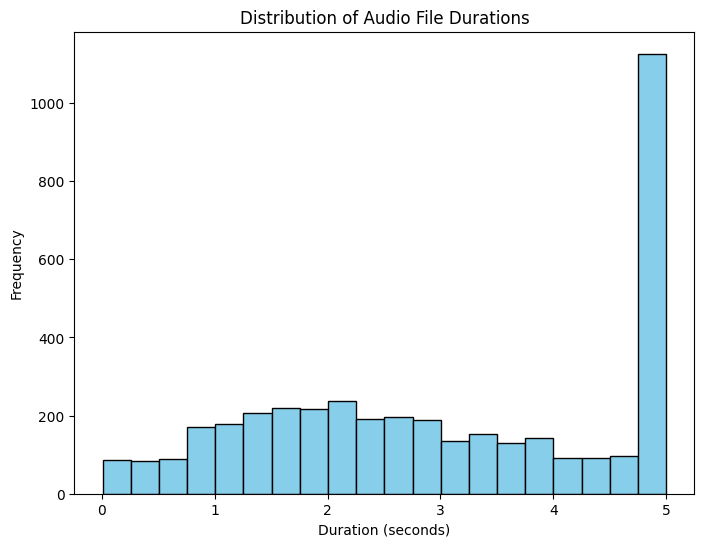

In [ ]:
import matplotlib.pyplot as plt

# Plotting a histogram of durations
plt.figure(figsize=(8, 6))
plt.hist(df['duration_sec'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Audio File Durations')
plt.show()


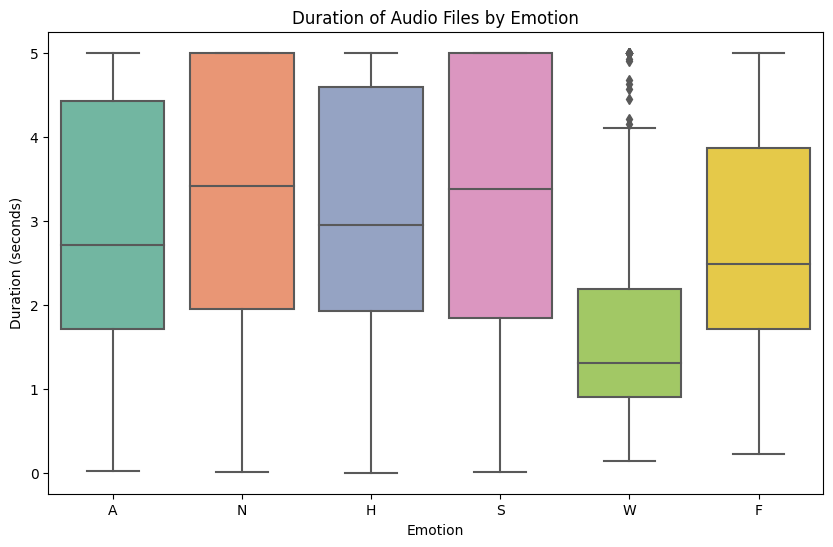

In [ ]:
import seaborn as sns

# Boxplot of duration by emotion
plt.figure(figsize=(10, 6))
sns.boxplot(x='emotion', y='duration_sec', data=df, palette='Set2')
plt.xlabel('Emotion')
plt.ylabel('Duration (seconds)')
plt.title('Duration of Audio Files by Emotion')
plt.show()


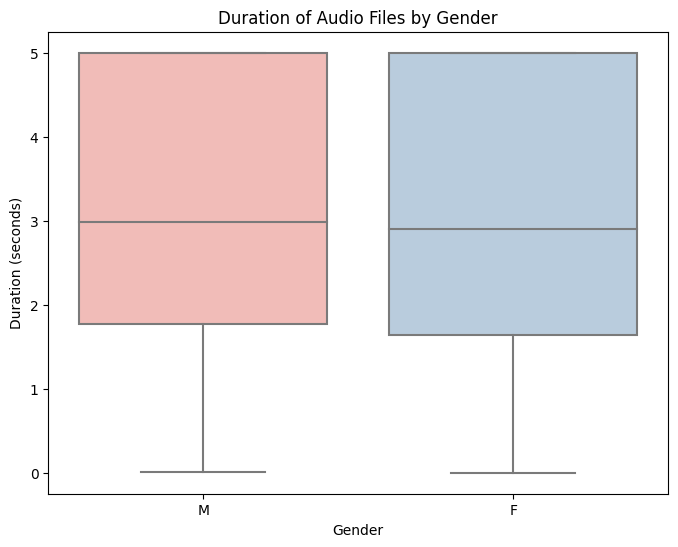

In [ ]:
# Boxplot of duration by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='duration_sec', data=df, palette='Pastel1')
plt.xlabel('Gender')
plt.ylabel('Duration (seconds)')
plt.title('Duration of Audio Files by Gender')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['labels'] = label_encoder.fit_transform(df['emotion'])

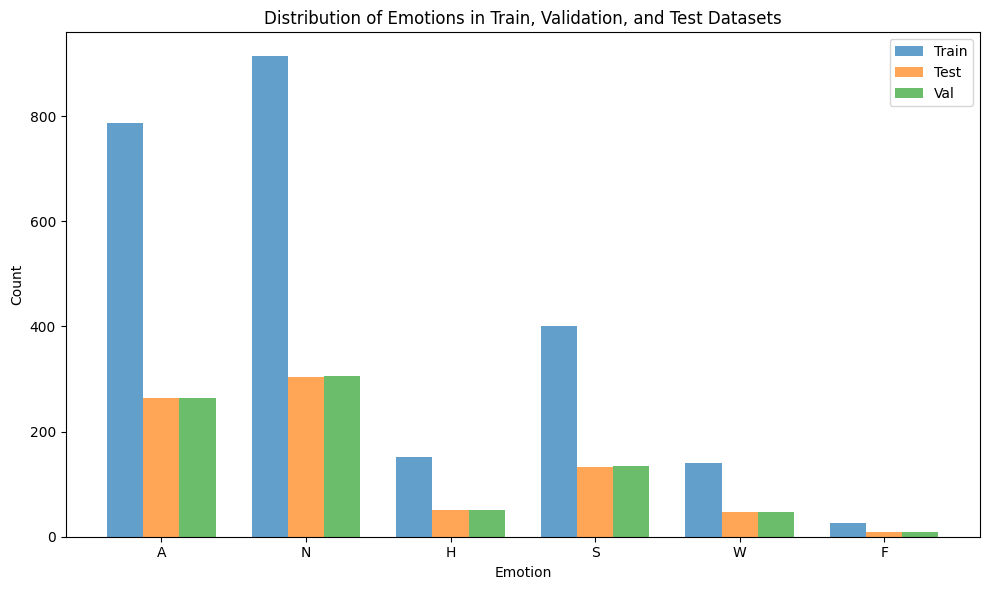

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' contains your DataFrame with 'emotion' as the target column
# Splitting the data into train (60%), validation (20%), and test (20%) while preserving the distribution of 'emotion'
train_df, test_val_df = train_test_split(df, test_size=0.4, stratify=df['emotion'])
test_df, val_df = train_test_split(test_val_df, test_size=0.5, stratify=test_val_df['emotion'])

# Get unique emotions
emotions = df['emotion'].unique()
num_emotions = len(emotions)

# Calculate emotion counts in train, validation, and test datasets
train_emotion_counts = train_df['emotion'].value_counts().reindex(emotions, fill_value=0)
test_emotion_counts = test_df['emotion'].value_counts().reindex(emotions, fill_value=0)
val_emotion_counts = val_df['emotion'].value_counts().reindex(emotions, fill_value=0)

# Set the positions for bars
bar_width = 0.25
index = np.arange(num_emotions)

# Plotting the distribution of emotions in train, validation, and test datasets side by side
plt.figure(figsize=(10, 6))
plt.bar(index, train_emotion_counts.values, alpha=0.7, label='Train', width=bar_width)
plt.bar(index + bar_width, test_emotion_counts.values, alpha=0.7, label='Test', width=bar_width)
plt.bar(index + 2 * bar_width, val_emotion_counts.values, alpha=0.7, label='Val', width=bar_width)

plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions in Train, Validation, and Test Datasets')
plt.xticks(index + bar_width, emotions)  # Set x-axis labels
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from transformers import Wav2Vec2FeatureExtractor
from datasets import Dataset
import librosa

def map_to_array(example):
    speech, _ = librosa.load(example["path"], sr=16000, mono=True)
    example["speech"] = speech
    return example

train_data = Dataset.from_pandas(train_df).map(map_to_array)
test_data = Dataset.from_pandas(test_df).map(map_to_array)
val_data = Dataset.from_pandas(val_df).map(map_to_array)



Map:   0%|          | 0/2421 [00:00<?, ? examples/s]

Map:   0%|          | 0/807 [00:00<?, ? examples/s]

Map:   0%|          | 0/808 [00:00<?, ? examples/s]

In [ ]:
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/hubert-base-ls960")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
def preprocess_function(examples):
    audio_arrays = [x for x in examples["speech"]]
    inputs = feature_extractor(
        audio_arrays, sampling_rate=feature_extractor.sampling_rate,max_length=16000, truncation=True, padding=True
    )
    return inputs

In [ ]:

train_encodings = train_data.map(preprocess_function, remove_columns="speech", batched=True)
test_encodings = test_data.map(preprocess_function, remove_columns="speech", batched=True)
val_encodings = val_data.map(preprocess_function, remove_columns="speech", batched=True)


Map:   0%|          | 0/2421 [00:00<?, ? examples/s]

Map:   0%|          | 0/807 [00:00<?, ? examples/s]

Map:   0%|          | 0/808 [00:00<?, ? examples/s]

In [ ]:
train_dataset = train_encodings.with_format("torch")
test_dataset = test_encodings.with_format("torch")
val_dataset = val_encodings.with_format("torch")

In [ ]:
import torch.nn as nn
from transformers import HubertModel

class HUBERTClassification(nn.Module):
    def __init__(self):
        super(HUBERTClassification, self).__init__()
        self.bert = HubertModel.from_pretrained("superb/hubert-base-superb-ks")
        self.bert.feature_extractor._freeze_parameters()

        self.bat2 = nn.BatchNorm1d(768)
        self.rel2 = nn.ReLU(inplace=True)
        self.drop1 = nn.Dropout(0.4)
        self.out2 = nn.Linear(768, 6)
        self.rel3 = nn.ReLU(inplace=True)

    def forward(self, inputs, attention_mask=None, labels=None):
        output = self.bert(inputs)['last_hidden_state']
        output = self.bat2(output.mean(axis=1))  # for wav2vec

        output = self.rel2(output)
        output = self.drop1(output)
        output = self.out2(output)
        output = self.rel3(output)

        return output


In [ ]:
from transformers import HubertForSequenceClassification
from torch.optim import AdamW
import torch
from tqdm import tqdm
# Loading the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = HUBERTClassification()
model.to(device)

# Loading the optimizer
optim = AdamW(model.parameters(), lr=1e-5)

Some weights of HubertModel were not initialized from the model checkpoint at superb/hubert-base-superb-ks and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def accuracy(predictions, labels):
    """
    Calculate the accuracy of predictions given the true labels.
    Args:
        predictions (torch.Tensor): Model predictions.
        labels (torch.Tensor): True labels.

    Returns:
        float: Accuracy.
    """
    _, predicted = torch.max(predictions, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy


In [ ]:
# Training

from torch.utils.data import DataLoader
import time
import torch.nn as nn
from torch.optim import AdamW
from tqdm import tqdm  # Assuming you're using tqdm for progress tracking

# Set the number of epochs
epochs = 10

# Start training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.to(device)

model.train()

train_accuracies = []
train_losses = []
val_accuracies = []
val_losses = []

# Define your loss function
criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=1e-5)
from tqdm import tqdm

# ... (your imports and code)

for epoch_i in range(epochs):
    print('Epoch %s/%s' % (epoch_i + 1, epochs))

    # Training
    model.train()  # Set the model to training mode
    correct_train = 0
    total_train = 0
    epoch_train_loss = 0.0

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    pbar_train = tqdm(train_loader, desc="Training", leave=False)

    for batch in pbar_train:
        optimizer.zero_grad()
        input_ids = batch['input_values'].to(device)
        labels = batch['labels'].type(torch.LongTensor).to(device)

        labels_pred = model(input_ids)
        loss = criterion(labels_pred, labels)
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item()

        _, predicted = torch.max(labels_pred.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        accuracy_train = correct_train / total_train
        average_train_loss = epoch_train_loss / (pbar_train.n + 1)  # +1 to avoid division by zero
        pbar_train.set_postfix(loss=average_train_loss, accuracy=accuracy_train)
        pbar_train.update()

    train_accuracies.append(accuracy_train)
    train_losses.append(average_train_loss)
    pbar_train.close()

    # Validation
    model.eval()  # Set the model to evaluation mode
    correct_val = 0
    total_val = 0
    epoch_val_loss = 0.0

    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    pbar_val = tqdm(val_loader, desc="Validation", leave=False)

    with torch.no_grad():  # No need to compute gradients during validation
        for batch in pbar_val:
            input_ids = batch['input_values'].to(device)
            labels = batch['labels'].type(torch.LongTensor).to(device)

            labels_pred = model(input_ids)
            loss = criterion(labels_pred, labels)

            _, predicted = torch.max(labels_pred.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            epoch_val_loss += loss.item()

            accuracy_val = correct_val / total_val
            average_val_loss = epoch_val_loss / (pbar_val.n + 1)  # +1 to avoid division by zero
            pbar_val.set_postfix(loss=average_val_loss, accuracy=accuracy_val)
            pbar_val.update()

    val_accuracies.append(accuracy_val)
    val_losses.append(average_val_loss)
    pbar_val.close()
    print(f"Epoch {epoch_i + 1} - Training Loss: {average_train_loss:.4f}, Training Accuracy: {accuracy_train:.4f}")
    print(f"Epoch {epoch_i + 1} - Validation Loss: {average_val_loss:.4f}, Validation Accuracy: {accuracy_val:.4f}")

# At this point, you can log or print the training metrics, and if needed, validate your model on a validation set.


Epoch 1/10


Epoch 1 - Training Loss: 1.5228, Training Accuracy: 0.2346
Epoch 1 - Validation Loss: 1.1920, Validation Accuracy: 0.4988
Epoch 2/10


Epoch 2 - Training Loss: 1.2287, Training Accuracy: 0.5031
Epoch 2 - Validation Loss: 0.9793, Validation Accuracy: 0.6002
Epoch 3/10


Epoch 3 - Training Loss: 1.0642, Training Accuracy: 0.5964
Epoch 3 - Validation Loss: 0.9071, Validation Accuracy: 0.6349
Epoch 4/10


Epoch 4 - Training Loss: 0.9825, Training Accuracy: 0.6225
Epoch 4 - Validation Loss: 0.8687, Validation Accuracy: 0.6498
Epoch 5/10


Epoch 5 - Training Loss: 0.9202, Training Accuracy: 0.6596
Epoch 5 - Validation Loss: 0.8392, Validation Accuracy: 0.6609
Epoch 6/10


Epoch 6 - Training Loss: 0.8715, Training Accuracy: 0.6687
Epoch 6 - Validation Loss: 0.7676, Validation Accuracy: 0.6856
Epoch 7/10


Epoch 7 - Training Loss: 0.8542, Training Accuracy: 0.6724
Epoch 7 - Validation Loss: 0.7801, Validation Accuracy: 0.6931
Epoch 8/10


Epoch 8 - Training Loss: 0.8040, Training Accuracy: 0.6956
Epoch 8 - Validation Loss: 0.7557, Validation Accuracy: 0.6931
Epoch 9/10


Epoch 9 - Training Loss: 0.7797, Training Accuracy: 0.6935
Epoch 9 - Validation Loss: 0.7701, Validation Accuracy: 0.6894
Epoch 10/10


Epoch 10 - Training Loss: 0.7628, Training Accuracy: 0.7125
Epoch 10 - Validation Loss: 0.7445, Validation Accuracy: 0.7116


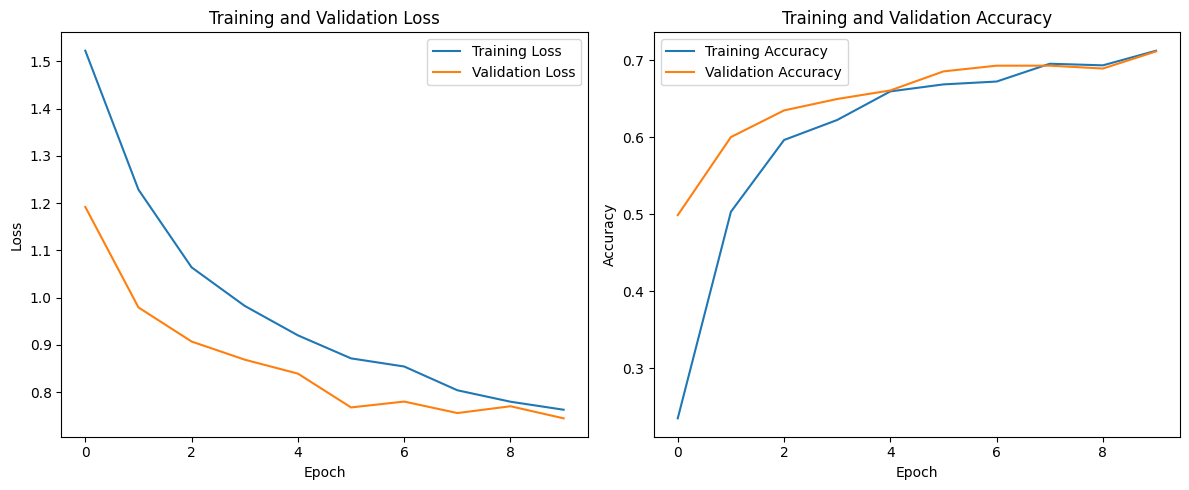

In [ ]:
import matplotlib.pyplot as plt

# ... (your imports and code)

# Your existing code for training and validation loops

# Plotting
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


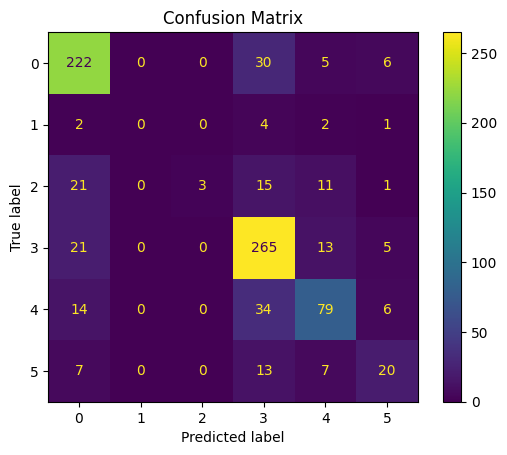

In [ ]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ... (your imports and code)

# Assuming you have a test_loader for your test dataset
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_labels = []

with torch.no_grad():  # No need to compute gradients during testing
    for batch in test_loader:
        input_ids = batch['input_values'].to(device)
        labels = batch['labels'].type(torch.LongTensor).to(device)

        labels_pred = model(input_ids)
        _, predicted = torch.max(labels_pred.data, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import torch
from sklearn.metrics import accuracy_score, classification_report

# ... (your imports and code)

# Assuming you have a test_loader for your test dataset
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_labels = []

with torch.no_grad():  # No need to compute gradients during testing
    for batch in test_loader:
        input_ids = batch['input_values'].to(device)
        labels = batch['labels'].type(torch.LongTensor).to(device)

        labels_pred = model(input_ids)
        _, predicted = torch.max(labels_pred.data, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute accuracy
accuracy = accuracy_score(all_labels, all_predictions)
print(f'Test Accuracy: {accuracy:.4f}')

# Classification report
class_names = [f'Class {i}' for i in range(6)]  # Replace with your actual class names
report = classification_report(all_labels, all_predictions, target_names=class_names)
print('Classification Report:\n', report)


Test Accuracy: 0.7299
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.77      0.84      0.81       263
     Class 1       0.00      0.00      0.00         9
     Class 2       1.00      0.06      0.11        51
     Class 3       0.73      0.87      0.80       304
     Class 4       0.68      0.59      0.63       133
     Class 5       0.51      0.43      0.47        47

    accuracy                           0.73       807
   macro avg       0.62      0.47      0.47       807
weighted avg       0.73      0.73      0.70       807



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Preprocessing (converting all Voices to 5 Sec)

In [ ]:
import os
import pandas as pd
# Path to your dataset folders (male and fema|le)
male_folder = '/content/dataset/male'
female_folder = '/content/dataset/female'

# Dictionary to store information
data_info = {
    'male': [],
    'female': []
}

# Function to extract information from the file names
def extract_info(file_path):
    file_info = {}
    filename = os.path.basename(file_path)  # Extract filename from the path
    file_info['gender'] = filename[0]  # Extracting the gender (M or F)
    file_info['speaker_code'] = filename[1:3]  # Extracting the speaker code
    file_info['emotion'] = filename[3]  # Extracting the emotion code
    file_info['utterance_number'] = filename[4:]  # Extracting the utterance number
    file_info['path'] = file_path  # Storing the complete file path
    return file_info

data = []

# Process male folder
for filename in os.listdir(male_folder):
    file_path = os.path.join(male_folder, filename)
    file_info = extract_info(file_path)
    data.append(file_info)

# Process female folder
for filename in os.listdir(female_folder):
    file_path = os.path.join(female_folder, filename)
    file_info = extract_info(file_path)
    data.append(file_info)

# Create a DataFrame from the collected data
df = pd.DataFrame(data)



In [ ]:
import os  # Import the os module for directory operations
import librosa
import soundfile as sf

def split_audio_and_save(row):
    file_path = row['path']
    audio, sr = librosa.load(file_path, sr=16000)  # Load the audio file

    segment_duration = 5  # Duration of each segment in seconds
    segment_samples = sr * segment_duration  # Convert duration to samples

    # Create a folder to save the segmented audio files if it doesn't exist
    folder_path = os.path.join(os.path.dirname(file_path), 'segmented_audio')
    os.makedirs(folder_path, exist_ok=True)

    # Split the audio into segments of 5 seconds each
    for i in range(0, len(audio), segment_samples):
        segment = audio[i:i + segment_samples]

        # Save the segment as a separate file in the folder
        segment_file_path = os.path.join(folder_path, f"{os.path.basename(file_path)}_segment_{i // segment_samples + 1}.wav")
        sf.write(segment_file_path, segment, sr)

# Apply the function to each row in the DataFrame
df.apply(split_audio_and_save, axis=1)


0       None
1       None
2       None
3       None
4       None
        ... 
2995    None
2996    None
2997    None
2998    None
2999    None
Length: 3000, dtype: object

In [ ]:
!mkdir modified_dataset
!mkdir modified_dataset/male
!mkdir modified_dataset/female
!mv /content/dataset/female/segmented_audio/* modified_dataset/female/
!mv /content/dataset/male/segmented_audio/* modified_dataset/male/


In [ ]:
import os
import pandas as pd
# Path to your dataset folders (male and fema|le)
male_folder = '/content/modified_dataset/male'
female_folder = '/content/modified_dataset/female'

# Dictionary to store information
data_info = {
    'male': [],
    'female': []
}

# Function to extract information from the file names
def extract_info(file_path):
    file_info = {}
    filename = os.path.basename(file_path)  # Extract filename from the path
    file_info['gender'] = filename[0]  # Extracting the gender (M or F)
    file_info['speaker_code'] = filename[1:3]  # Extracting the speaker code
    file_info['emotion'] = filename[3]  # Extracting the emotion code
    file_info['utterance_number'] = filename[4:]  # Extracting the utterance number
    file_info['path'] = file_path  # Storing the complete file path
    return file_info

data = []

# Process male folder
for filename in os.listdir(male_folder):
    file_path = os.path.join(male_folder, filename)
    file_info = extract_info(file_path)
    data.append(file_info)

# Process female folder
for filename in os.listdir(female_folder):
    file_path = os.path.join(female_folder, filename)
    file_info = extract_info(file_path)
    data.append(file_info)

# Create a DataFrame from the collected data
df = pd.DataFrame(data)

# Display the DataFrame
print(df)


     gender speaker_code emotion      utterance_number  \
0         M           12       A  59.wav_segment_1.wav   
1         M           02       N  07.wav_segment_1.wav   
2         M           40       N  25.wav_segment_3.wav   
3         M           44       N  07.wav_segment_2.wav   
4         M           41       H  02.wav_segment_2.wav   
...     ...          ...     ...                   ...   
4031      F           23       A  20.wav_segment_1.wav   
4032      F           01       H  04.wav_segment_1.wav   
4033      F           28       A  13.wav_segment_1.wav   
4034      F           17       S  04.wav_segment_1.wav   
4035      F           11       A  01.wav_segment_1.wav   

                                                   path  
0     /content/modified_dataset/male/M12A59.wav_segm...  
1     /content/modified_dataset/male/M02N07.wav_segm...  
2     /content/modified_dataset/male/M40N25.wav_segm...  
3     /content/modified_dataset/male/M44N07.wav_segm...  
4     /conten

In [ ]:
print(len(df))

4036


In [ ]:
import librosa

# Function to calculate duration in seconds for an audio file
def get_duration(file_path):
    audio, sr = librosa.load(file_path)
    duration_sec = librosa.get_duration(y=audio, sr=sr)
    return duration_sec

# Assuming 'df' contains a column named 'path' with file paths
# Add a new column 'duration_sec' to store voice durations
df['duration_sec'] = df['path'].apply(lambda x: get_duration(x))


In [ ]:
import pandas as pd

# Assuming your DataFrame is named df
# df = ...

# List of emotions to oversample
emotions_to_oversample = ["F", "H", "W"]

# Determine the desired oversampling size


# Initialize an empty DataFrame for oversampling
df_oversampled = pd.DataFrame()

# Perform oversampling for each emotion
for emotion in emotions_to_oversample:
    # Filter rows where 'emotion' is equal to the current emotion
    df_emotion = df[df['emotion'] == emotion]
    oversample_size = int((len(df[df['emotion'] == "A"])/2)/len(df_emotion)) # You can adjust this as needed
    # Perform oversampling using resample
    df_emotion_oversampled = pd.concat([df_emotion] * oversample_size, ignore_index=True)

    # Combine the oversampled DataFrame with the main oversampled DataFrame
    df_oversampled = pd.concat([df_oversampled, df_emotion_oversampled], ignore_index=True)

# Combine the oversampled DataFrame with the original DataFrame
df = pd.concat([df, df_oversampled], ignore_index=True)

# Print the oversampled DataFrame
print(df_oversampled)


     gender speaker_code emotion      utterance_number  \
0         M           26       F  01.wav_segment_1.wav   
1         M           19       F  01.wav_segment_1.wav   
2         M           32       F  01.wav_segment_1.wav   
3         M           16       F  01.wav_segment_1.wav   
4         M           05       F  01.wav_segment_1.wav   
...     ...          ...     ...                   ...   
1587      F           03       W  05.wav_segment_1.wav   
1588      F           24       W  05.wav_segment_1.wav   
1589      F           21       W  27.wav_segment_1.wav   
1590      F           02       W  02.wav_segment_1.wav   
1591      F           05       W  03.wav_segment_2.wav   

                                                   path  duration_sec  
0     /content/modified_dataset/male/M26F01.wav_segm...      1.566395  
1     /content/modified_dataset/male/M19F01.wav_segm...      2.586440  
2     /content/modified_dataset/male/M32F01.wav_segm...      1.223447  
3     /content/

In [ ]:
df.head()

,gender,speaker_code,emotion,utterance_number,path,duration_sec
0,M,12,A,59.wav_segment_1.wav,/content/modified_dataset/male/M12A59.wav_segm...,5.000000
1,M,02,N,07.wav_segment_1.wav,/content/modified_dataset/male/M02N07.wav_segm...,4.117279
2,M,40,N,25.wav_segment_3.wav,/content/modified_dataset/male/M40N25.wav_segm...,0.828209
3,M,44,N,07.wav_segment_2.wav,/content/modified_dataset/male/M44N07.wav_segm...,5.000000
4,M,41,H,02.wav_segment_2.wav,/content/modified_dataset/male/M41H02.wav_segm...,2.851791


In [ ]:
df.describe(include='all')

,gender,speaker_code,emotion,utterance_number,path,duration_sec
count,5628,5628,5628,5628,5628,5628.000000
unique,2,56,6,282,4036,NaN
top,M,21,N,01.wav_segment_1.wav,/content/modified_dataset/female/F09F01.wav_se...,NaN
freq,3040,410,1523,883,15,NaN
mean,NaN,NaN,NaN,NaN,NaN,2.907834
std,NaN,NaN,NaN,NaN,NaN,1.552173
min,NaN,NaN,NaN,NaN,NaN,0.006349
25%,NaN,NaN,NaN,NaN,NaN,1.584059
50%,NaN,NaN,NaN,NaN,NaN,2.682245
75%,NaN,NaN,NaN,NaN,NaN,4.672336


In [ ]:
# Value counts for the 'gender' column
gender_counts = df['gender'].value_counts()

# Display the value counts for gender
print(gender_counts)


M    3040
F    2588
Name: gender, dtype: int64


In [ ]:
# Value counts for the 'gender' column
gender_counts = df['emotion'].value_counts()

# Display the value counts for gender
print(gender_counts)

N    1523
A    1314
H     759
W     705
S     667
F     660
Name: emotion, dtype: int64


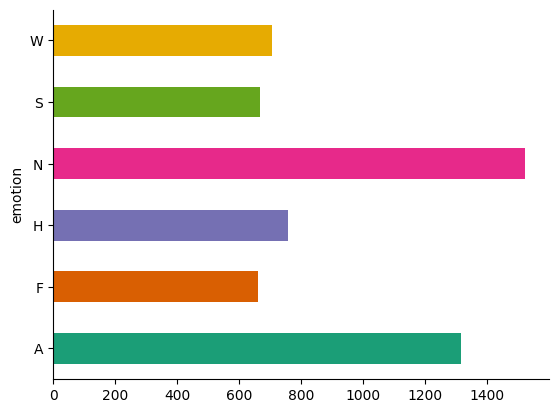

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('emotion').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

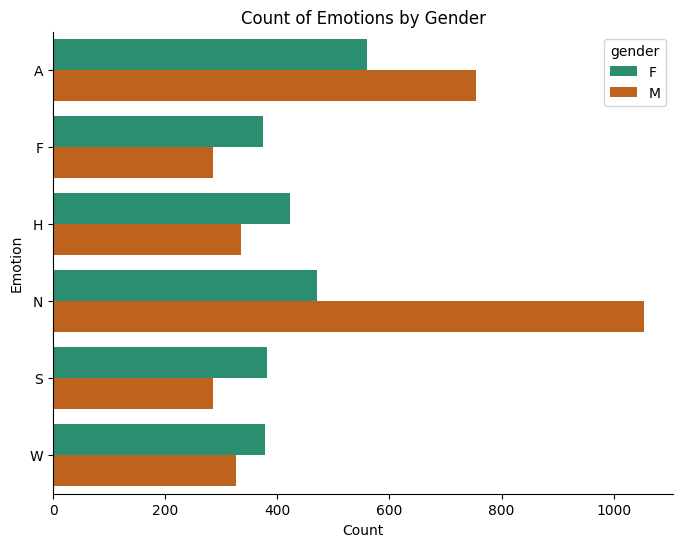

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

# Assuming 'df' contains your DataFrame with columns 'gender' and 'emotion'

# Grouping by 'gender' and 'emotion', then counting occurrences
grouped = df.groupby(['gender', 'emotion']).size().reset_index(name='count')

# Plotting the grouped bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x='count', y='emotion', hue='gender', data=grouped, palette='Dark2')

# Removing the spines (top and right)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding labels and title
plt.xlabel('Count')
plt.ylabel('Emotion')
plt.title('Count of Emotions by Gender')

plt.show()


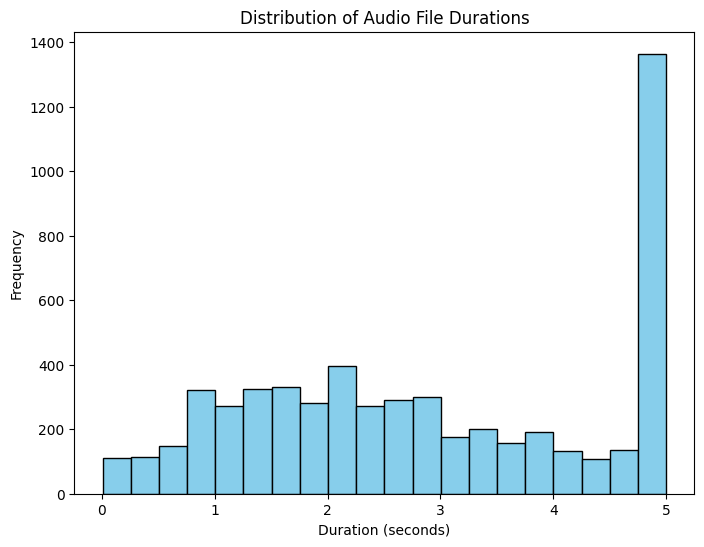

In [ ]:
import matplotlib.pyplot as plt

# Plotting a histogram of durations
plt.figure(figsize=(8, 6))
plt.hist(df['duration_sec'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Duration (seconds)')
plt.ylabel('Frequency')
plt.title('Distribution of Audio File Durations')
plt.show()


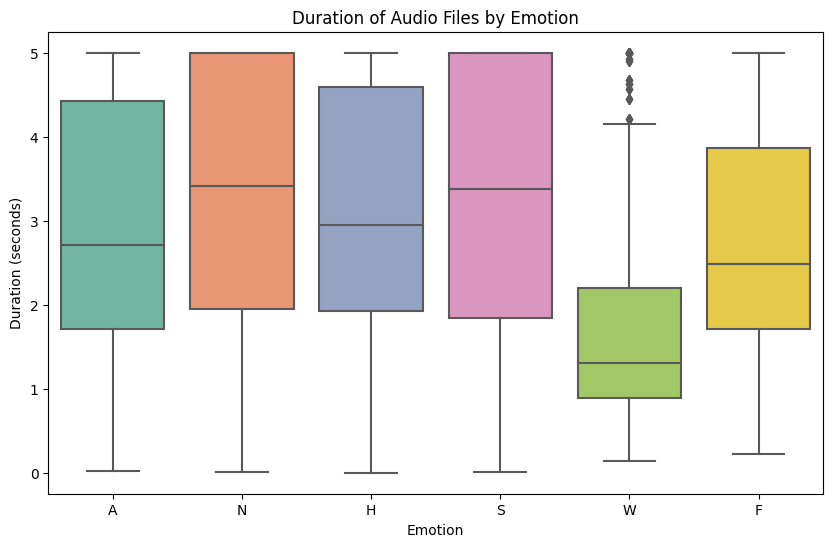

In [ ]:
import seaborn as sns

# Boxplot of duration by emotion
plt.figure(figsize=(10, 6))
sns.boxplot(x='emotion', y='duration_sec', data=df, palette='Set2')
plt.xlabel('Emotion')
plt.ylabel('Duration (seconds)')
plt.title('Duration of Audio Files by Emotion')
plt.show()


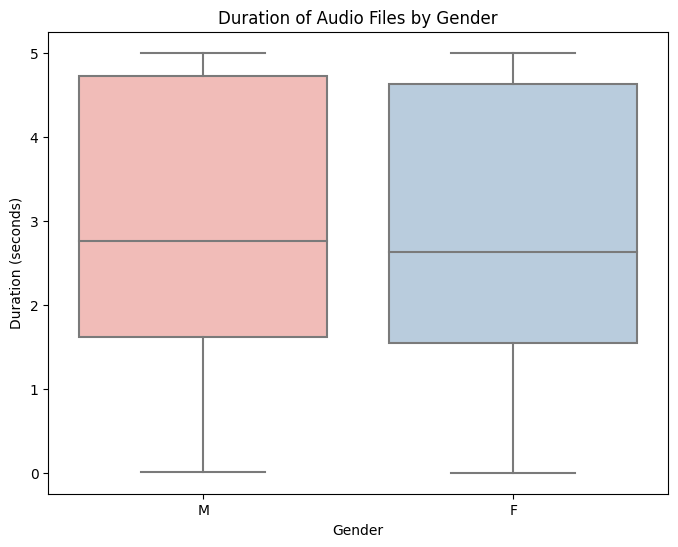

In [ ]:
# Boxplot of duration by gender
plt.figure(figsize=(8, 6))
sns.boxplot(x='gender', y='duration_sec', data=df, palette='Pastel1')
plt.xlabel('Gender')
plt.ylabel('Duration (seconds)')
plt.title('Duration of Audio Files by Gender')
plt.show()


In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['labels'] = label_encoder.fit_transform(df['emotion'])

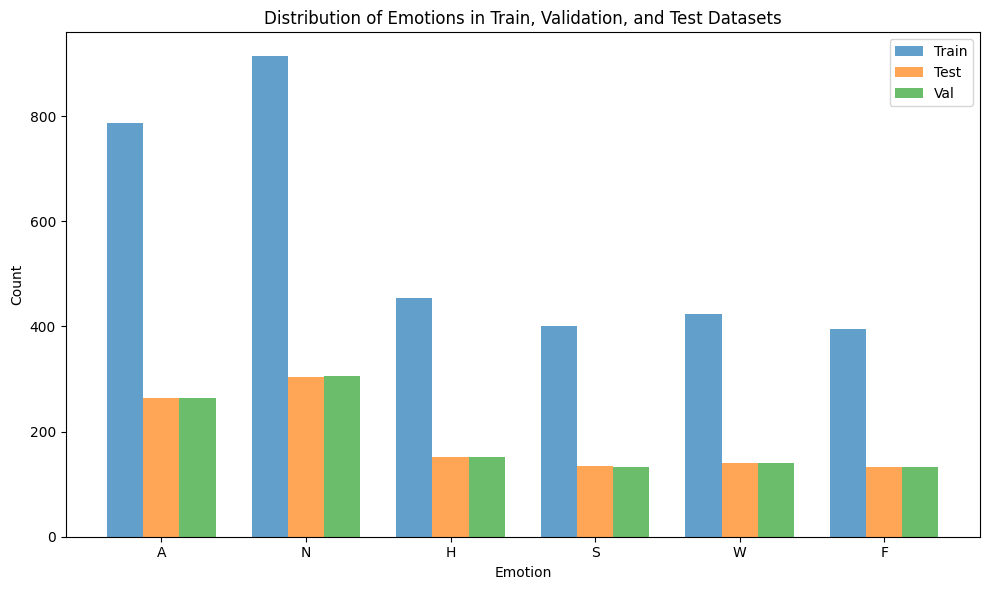

In [ ]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' contains your DataFrame with 'emotion' as the target column
# Splitting the data into train (60%), validation (20%), and test (20%) while preserving the distribution of 'emotion'
train_df, test_val_df = train_test_split(df, test_size=0.4, stratify=df['emotion'])
test_df, val_df = train_test_split(test_val_df, test_size=0.5, stratify=test_val_df['emotion'])

# Get unique emotions
emotions = df['emotion'].unique()
num_emotions = len(emotions)

# Calculate emotion counts in train, validation, and test datasets
train_emotion_counts = train_df['emotion'].value_counts().reindex(emotions, fill_value=0)
test_emotion_counts = test_df['emotion'].value_counts().reindex(emotions, fill_value=0)
val_emotion_counts = val_df['emotion'].value_counts().reindex(emotions, fill_value=0)

# Set the positions for bars
bar_width = 0.25
index = np.arange(num_emotions)

# Plotting the distribution of emotions in train, validation, and test datasets side by side
plt.figure(figsize=(10, 6))
plt.bar(index, train_emotion_counts.values, alpha=0.7, label='Train', width=bar_width)
plt.bar(index + bar_width, test_emotion_counts.values, alpha=0.7, label='Test', width=bar_width)
plt.bar(index + 2 * bar_width, val_emotion_counts.values, alpha=0.7, label='Val', width=bar_width)

plt.xlabel('Emotion')
plt.ylabel('Count')
plt.title('Distribution of Emotions in Train, Validation, and Test Datasets')
plt.xticks(index + bar_width, emotions)  # Set x-axis labels
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from transformers import Wav2Vec2FeatureExtractor
from datasets import Dataset
import librosa

def map_to_array(example):
    speech, _ = librosa.load(example["path"], sr=16000, mono=True)
    example["speech"] = speech
    return example

train_data = Dataset.from_pandas(train_df).map(map_to_array)
test_data = Dataset.from_pandas(test_df).map(map_to_array)
val_data = Dataset.from_pandas(val_df).map(map_to_array)



Map:   0%|          | 0/3376 [00:00<?, ? examples/s]

Map:   0%|          | 0/1126 [00:00<?, ? examples/s]

Map:   0%|          | 0/1126 [00:00<?, ? examples/s]

In [ ]:
feature_extractor = Wav2Vec2FeatureExtractor.from_pretrained("facebook/hubert-base-ls960")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:72: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
def preprocess_function(examples):
    audio_arrays = [x for x in examples["speech"]]
    inputs = feature_extractor(
        audio_arrays, sampling_rate=feature_extractor.sampling_rate,max_length=16000, truncation=True, padding=True
    )
    return inputs

In [ ]:

train_encodings = train_data.map(preprocess_function, remove_columns="speech", batched=True)
test_encodings = test_data.map(preprocess_function, remove_columns="speech", batched=True)
val_encodings = val_data.map(preprocess_function, remove_columns="speech", batched=True)


Map:   0%|          | 0/3376 [00:00<?, ? examples/s]

Map:   0%|          | 0/1126 [00:00<?, ? examples/s]

Map:   0%|          | 0/1126 [00:00<?, ? examples/s]

In [ ]:
train_dataset = train_encodings.with_format("torch")
test_dataset = test_encodings.with_format("torch")
val_dataset = val_encodings.with_format("torch")

In [ ]:
import torch.nn as nn
from transformers import HubertModel

class HUBERTClassification(nn.Module):
    def __init__(self):
        super(HUBERTClassification, self).__init__()
        self.bert = HubertModel.from_pretrained("superb/hubert-base-superb-ks")
        self.bert.feature_extractor._freeze_parameters()

        self.bat2 = nn.BatchNorm1d(768)
        self.rel2 = nn.ReLU(inplace=True)
        self.drop1 = nn.Dropout(0.4)
        self.out2 = nn.Linear(768, 6)
        self.rel3 = nn.ReLU(inplace=True)

    def forward(self, inputs, attention_mask=None, labels=None):
        output = self.bert(inputs)['last_hidden_state']
        output = self.bat2(output.mean(axis=1))  # for wav2vec

        output = self.rel2(output)
        output = self.drop1(output)
        output = self.out2(output)
        output = self.rel3(output)

        return output


In [ ]:
from transformers import HubertForSequenceClassification
from torch.optim import AdamW
import torch
from tqdm import tqdm
# Loading the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = HUBERTClassification()
model.to(device)

# Loading the optimizer
optim = AdamW(model.parameters(), lr=1e-5)

Some weights of HubertModel were not initialized from the model checkpoint at superb/hubert-base-superb-ks and are newly initialized: ['hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'hubert.encoder.pos_conv_embed.conv.parametrizations.weight.original0']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def accuracy(predictions, labels):
    """
    Calculate the accuracy of predictions given the true labels.
    Args:
        predictions (torch.Tensor): Model predictions.
        labels (torch.Tensor): True labels.

    Returns:
        float: Accuracy.
    """
    _, predicted = torch.max(predictions, 1)
    correct = (predicted == labels).sum().item()
    total = labels.size(0)
    accuracy = correct / total
    return accuracy


In [ ]:
# Training

from torch.utils.data import DataLoader
import time
import torch.nn as nn
from torch.optim import AdamW
from tqdm import tqdm  # Assuming you're using tqdm for progress tracking

# Set the number of epochs
epochs = 10

# Start training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = model.to(device)

model.train()

train_accuracies = []
train_losses = []
val_accuracies = []
val_losses = []

# Define your loss function
criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=1e-5)
from tqdm import tqdm

# ... (your imports and code)

for epoch_i in range(epochs):
    print('Epoch %s/%s' % (epoch_i + 1, epochs))

    # Training
    model.train()  # Set the model to training mode
    correct_train = 0
    total_train = 0
    epoch_train_loss = 0.0

    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    pbar_train = tqdm(train_loader, desc="Training", leave=False)

    for batch in pbar_train:
        optimizer.zero_grad()
        input_ids = batch['input_values'].to(device)
        labels = batch['labels'].type(torch.LongTensor).to(device)

        labels_pred = model(input_ids)
        loss = criterion(labels_pred, labels)
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item()

        _, predicted = torch.max(labels_pred.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()

        accuracy_train = correct_train / total_train
        average_train_loss = epoch_train_loss / (pbar_train.n + 1)  # +1 to avoid division by zero
        pbar_train.set_postfix(loss=average_train_loss, accuracy=accuracy_train)
        pbar_train.update()

    train_accuracies.append(accuracy_train)
    train_losses.append(average_train_loss)
    pbar_train.close()

    # Validation
    model.eval()  # Set the model to evaluation mode
    correct_val = 0
    total_val = 0
    epoch_val_loss = 0.0

    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
    pbar_val = tqdm(val_loader, desc="Validation", leave=False)

    with torch.no_grad():  # No need to compute gradients during validation
        for batch in pbar_val:
            input_ids = batch['input_values'].to(device)
            labels = batch['labels'].type(torch.LongTensor).to(device)

            labels_pred = model(input_ids)
            loss = criterion(labels_pred, labels)

            _, predicted = torch.max(labels_pred.data, 1)
            total_val += labels.size(0)
            correct_val += (predicted == labels).sum().item()

            epoch_val_loss += loss.item()

            accuracy_val = correct_val / total_val
            average_val_loss = epoch_val_loss / (pbar_val.n + 1)  # +1 to avoid division by zero
            pbar_val.set_postfix(loss=average_val_loss, accuracy=accuracy_val)
            pbar_val.update()

    val_accuracies.append(accuracy_val)
    val_losses.append(average_val_loss)
    pbar_val.close()
    print(f"Epoch {epoch_i + 1} - Training Loss: {average_train_loss:.4f}, Training Accuracy: {accuracy_train:.4f}")
    print(f"Epoch {epoch_i + 1} - Validation Loss: {average_val_loss:.4f}, Validation Accuracy: {accuracy_val:.4f}")

# At this point, you can log or print the training metrics, and if needed, validate your model on a validation set.


Epoch 1/10


Epoch 1 - Training Loss: 1.5612, Training Accuracy: 0.2355
Epoch 1 - Validation Loss: 1.2801, Validation Accuracy: 0.3890
Epoch 2/10


Epoch 2 - Training Loss: 1.3639, Training Accuracy: 0.4123
Epoch 2 - Validation Loss: 1.1055, Validation Accuracy: 0.5018
Epoch 3/10


Epoch 3 - Training Loss: 1.2109, Training Accuracy: 0.5018
Epoch 3 - Validation Loss: 0.9987, Validation Accuracy: 0.5391
Epoch 4/10


Epoch 4 - Training Loss: 1.1176, Training Accuracy: 0.5566
Epoch 4 - Validation Loss: 0.8901, Validation Accuracy: 0.6066
Epoch 5/10


Epoch 5 - Training Loss: 1.0396, Training Accuracy: 0.5921
Epoch 5 - Validation Loss: 0.8436, Validation Accuracy: 0.6359
Epoch 6/10


Epoch 6 - Training Loss: 0.9601, Training Accuracy: 0.6226
Epoch 6 - Validation Loss: 0.8062, Validation Accuracy: 0.6536
Epoch 7/10


Epoch 7 - Training Loss: 0.9119, Training Accuracy: 0.6525
Epoch 7 - Validation Loss: 0.7597, Validation Accuracy: 0.6821
Epoch 8/10


Epoch 8 - Training Loss: 0.8835, Training Accuracy: 0.6570
Epoch 8 - Validation Loss: 0.7739, Validation Accuracy: 0.6741
Epoch 9/10


Epoch 9 - Training Loss: 0.8465, Training Accuracy: 0.6795
Epoch 9 - Validation Loss: 0.7248, Validation Accuracy: 0.6936
Epoch 10/10


Epoch 10 - Training Loss: 0.7730, Training Accuracy: 0.7017
Epoch 10 - Validation Loss: 0.7514, Validation Accuracy: 0.6785


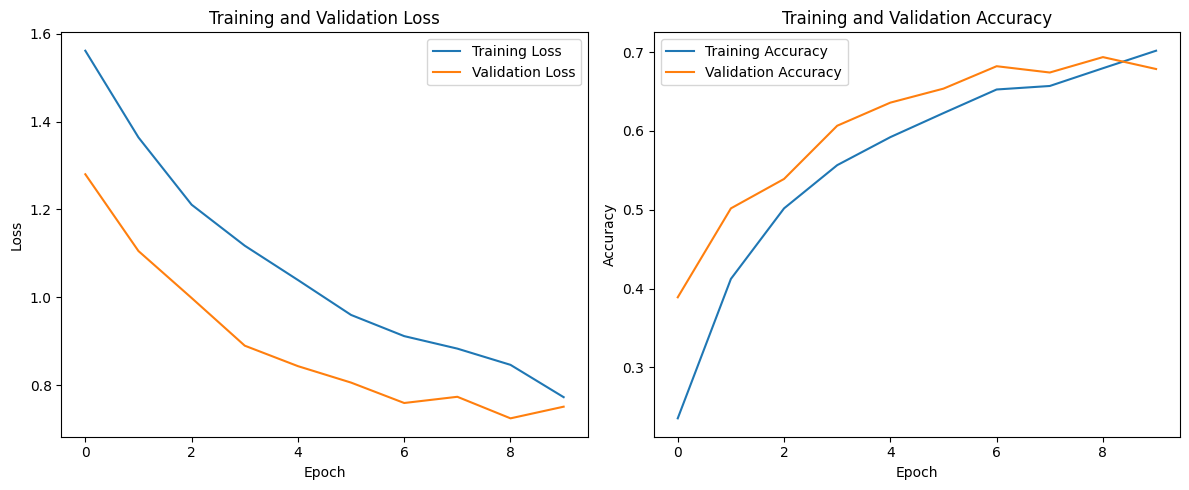

In [ ]:
import matplotlib.pyplot as plt

# ... (your imports and code)

# Your existing code for training and validation loops

# Plotting
plt.figure(figsize=(12, 5))

# Plot training and validation loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

# Plot training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


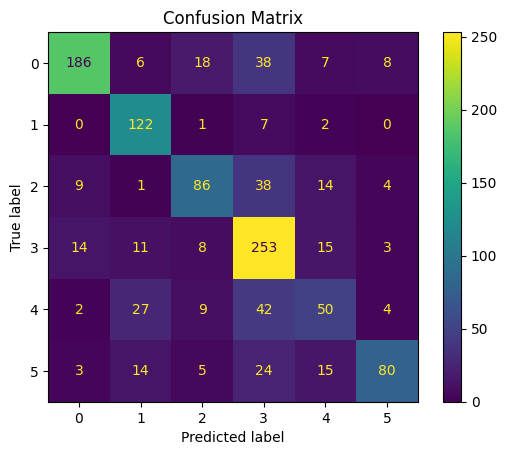

In [ ]:
import torch
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# ... (your imports and code)

# Assuming you have a test_loader for your test dataset
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_labels = []

with torch.no_grad():  # No need to compute gradients during testing
    for batch in test_loader:
        input_ids = batch['input_values'].to(device)
        labels = batch['labels'].type(torch.LongTensor).to(device)

        labels_pred = model(input_ids)
        _, predicted = torch.max(labels_pred.data, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(conf_matrix)
disp.plot(cmap='viridis', values_format='d')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
import torch
from sklearn.metrics import accuracy_score, classification_report

# ... (your imports and code)

# Assuming you have a test_loader for your test dataset
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

model.eval()  # Set the model to evaluation mode
all_predictions = []
all_labels = []

with torch.no_grad():  # No need to compute gradients during testing
    for batch in test_loader:
        input_ids = batch['input_values'].to(device)
        labels = batch['labels'].type(torch.LongTensor).to(device)

        labels_pred = model(input_ids)
        _, predicted = torch.max(labels_pred.data, 1)

        all_predictions.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Compute accuracy
accuracy = accuracy_score(all_labels, all_predictions)
print(f'Test Accuracy: {accuracy:.4f}')

# Classification report
class_names = [f'Class {i}' for i in range(6)]  # Replace with your actual class names
report = classification_report(all_labels, all_predictions, target_names=class_names)
print('Classification Report:\n', report)


Test Accuracy: 0.6901
Classification Report:
               precision    recall  f1-score   support

     Class 0       0.87      0.71      0.78       263
     Class 1       0.67      0.92      0.78       132
     Class 2       0.68      0.57      0.62       152
     Class 3       0.63      0.83      0.72       304
     Class 4       0.49      0.37      0.42       134
     Class 5       0.81      0.57      0.67       141

    accuracy                           0.69      1126
   macro avg       0.69      0.66      0.66      1126
weighted avg       0.70      0.69      0.68      1126

